### importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading Dataset

In [3]:
from sklearn.datasets import load_iris
dataset=load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Names of label and features

In [4]:
print(dataset.target_names)   
print(dataset.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Extracting features and label from the dataset

In [5]:
X=dataset.data
y=dataset.target
print(np.unique(y))      # To check how many different lables are in y

[0 1 2]


### visualizing the relation between petal length and petal width

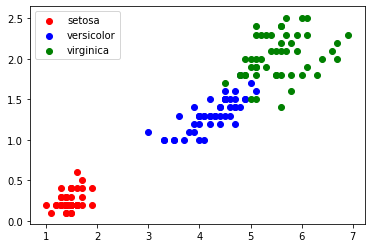

In [6]:
plt.scatter(X[y==0,2],X[y==0,3],c='r',Label='setosa')
plt.scatter(X[y==1,2],X[y==1,3],c='b',Label='versicolor')
plt.scatter(X[y==2,2],X[y==2,3],c='g',Label="verginica")
plt.legend(['setosa','versicolor','virginica'])

##### From the above scatter plot we can conclude that flower having less petal length and width are more likely to be setosa, flowers having  average petal length and width are more likely to be versicolor and having more petal length and width are more likely to be virginica.

### Correlation

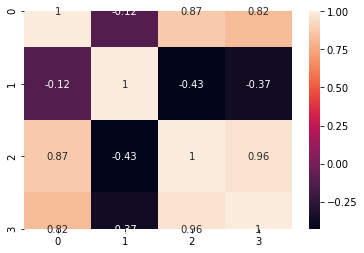

In [8]:
X=pd.DataFrame(X)
corr=X.corr()
sns.heatmap(corr,annot=True)

### Split the data into train and test set

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=46)

### Creating model 

In [8]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(multi_class='auto',solver='liblinear')

### Fitting model

In [9]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction Using test set

In [10]:
y_pred=lr_model.predict(X_test)
y_pred

array([0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1,
       1])

### accuracy check 

In [15]:
print(y_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

[0 1 2 0 0 2 0 1 1 1 1 2 0 2 0 0 0 0 1 2 0 2 0 1 2 0 1 2 2 1 1 2 0 2 2 0 0
 2 2 0 1 0 2 1 1]


0.9555555555555556

In [22]:
print(confusion_matrix(y_test,y_pred,labels=[0,1,2]))
print(classification_report(y_test,y_pred, labels=[0,1,2]))
import os
os.getcwd()

[[17  0  0]
 [ 0 12  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.92      0.92        13
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



'C:\\Users\\sulem'